In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as ss

%matplotlib inline

In [7]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/')
        
for item in tree:
    print(item)

('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/', ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05', ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'], [])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov', [], ['data.csv'])
('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smi

In [8]:
tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/')
data_files = []
target_file = 'data.csv'

for item in tree:
    files = item[-1]
    if len(files) > 0 and target_file in files:
        path = os.path.join(item[0], target_file)
        data_files.append(path)

In [9]:
data_files

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-05/Alexey_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-repin/shared/homeworks/python_ds_miniprojects/4/data/2020-12-08/Petr_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-ju

In [10]:
data_files_df = []

for path in data_files:
    df = pd.read_csv(path, index_col=0)
    date, name = path.split('/')[10:12]
    df['name'] = name
    df['date'] = date
    data_files_df.append(df)

In [11]:
data_files_df[0].head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [34]:
data = pd.concat(data_files_df, ignore_index=True)
data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [21]:
data.groupby('name', as_index=False).quantity.sum().sort_values('quantity', ascending=False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [28]:
x = data.groupby('product_id', as_index=False).quantity.sum().sort_values('quantity', ascending=False).head(10)
x

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


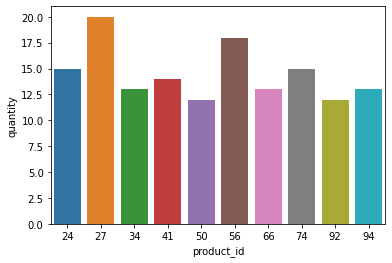

In [29]:
sns.barplot(x=x.product_id, y=x.quantity)

In [32]:
data.groupby('date', as_index=False).quantity.sum().sort_values('date', ascending=False).head(15)

,date,quantity
6,2020-12-09,69
5,2020-12-08,68
4,2020-12-07,94
3,2020-12-06,15
2,2020-12-05,61
1,2020-12-04,113
0,2020-12-03,60


In [39]:
x = data.drop_duplicates('product_id')

In [41]:
y = x.drop_duplicates('name')

In [42]:
y.drop_duplicates('date')

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
24,6,1,Petr_Petrov,2020-12-08
49,4,4,Alexey_Smirnov,2020-12-09
69,80,1,Kirill_Fedorov,2020-12-04
105,97,3,Vasiliy_Fedorov,2020-12-06
117,61,1,Anton_Petrov,2020-12-03


In [46]:
data.drop_duplicates(subset=['date', 'product_id'])

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07
